In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


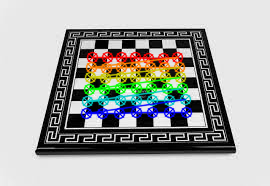

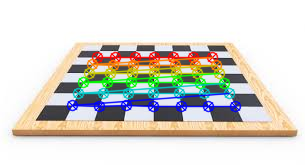

Camera matrix:
 [[294.92789924   0.         134.10999627]
 [  0.         317.03532268 107.01471138]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[ 2.37390881e-01 -5.80854313e+00 -1.36391924e-03 -1.33098583e-02
   3.08091120e+01]]


In [ ]:
import cv2 #EXP-3
import numpy as np
import glob
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Prepare object points (0,0,0), (1,0,0), ..., (6,5,0) # these are fixed in the real world (Z=0 for all since it's a flat board).
objp = np.zeros((6*7,3), np.float32) #You're creating the 3D object points corresponding to the checkerboard pattern (7 columns and 6 rows of inner corners).
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2) #generates a 2D grid of points from (0,0) to (6,5)

objpoints = []  # Will store 3D points (objp) for all images.
imgpoints = []  # Will store the corresponding 2D points detected from each image

# Load all images in the directory
images = glob.glob('/content/drive/MyDrive/opencv/checkboard_images/*.jpg') #Uses glob to load all .jpg files from the specified directory

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None) #looks for the 7×6 inner corners on the checkerboard.

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(img, (7,6), corners, ret)
        cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
        # cv2.waitKey(100) # waitKey is not needed with cv2_imshow

# cv2.destroyAllWindows() # destroyAllWindows is not needed with cv2_imshow

# Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
image = cv2.imread("checkboard_images")

# Rotate 90 degrees clockwise
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
print("Camera matrix:\n", mtx)
print("Distortion coefficients:\n", dist)

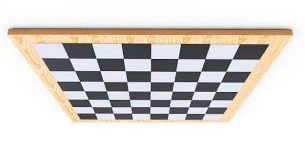

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

path = '/content/drive/MyDrive/opencv/images1.jpg'
src = cv2.imread(path)
rotated = cv2.rotate(src, cv2.ROTATE_180)

cv2_imshow(rotated) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0) # waitKey is not needed with cv2_imshow
# cv2.destroyAllWindows() # destroyAllWindows is not needed with cv2_imshow

Original Image:


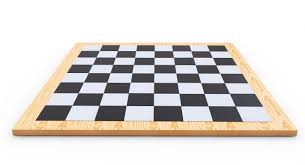

Resized by Dimensions:


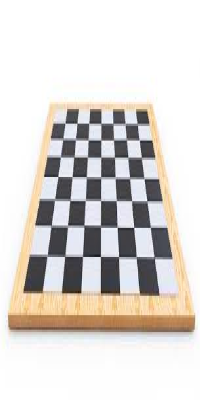

Resized by Scaling Factors:


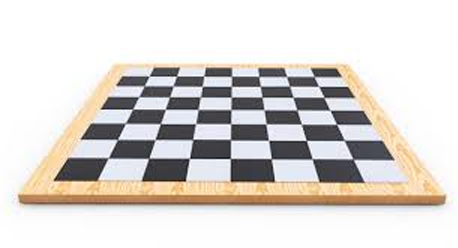

In [ ]:
import cv2 #scaling function
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load an image
path = '/content/drive/MyDrive/opencv/images1.jpg'
src = cv2.imread(path)

# Check if the image was loaded successfully
if src is None:
    print(f"Error: Unable to load image from {path}. Please check the file path.")
else:
    # Resize by absolute dimensions
    resized_image_dim = cv2.resize(src, (200, 400), interpolation=cv2.INTER_AREA)

    # Resize by scaling factors (e.g., enlarge by 1.5x)
    resized_image_scale = cv2.resize(src, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

    # Display the images
    print("Original Image:")
    cv2_imshow(src)
    print("Resized by Dimensions:")
    cv2_imshow(resized_image_dim)
    print("Resized by Scaling Factors:")
    cv2_imshow(resized_image_scale)

Original Image:


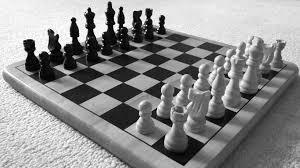

Translated Image:


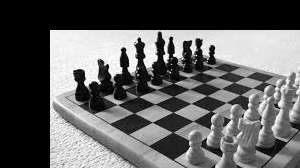

In [ ]:
import cv2 #translate built in function
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load the image
path = '/content/drive/MyDrive/opencv/images2.jpg'
src = cv2.imread(path)

# Check if the image was loaded successfully
if src is None:
    print(f"Error: Unable to load image from {path}. Please check the file path.")
else:
    # Define the translation amounts
    tx = 50  # Shift 50 pixels to the right
    ty = 30  # Shift 30 pixels down

    # Create the 2x3 translation matrix
    M = np.float32([[1, 0, tx], [0, 1, ty]])

    # Get the dimensions of the image
    rows, cols, _ = src.shape

    # Apply the affine transformation (translation)
    translated_image = cv2.warpAffine(src, M, (cols, rows))

    # Display the original and translated images
    print("Original Image:")
    cv2_imshow(src)
    print("Translated Image:")
    cv2_imshow(translated_image)
    # cv2.waitKey(0) # Not needed with cv2_imshow
    # cv2.destroyAllWindows() # Not needed with cv2_imshow